In [299]:
from selenium import webdriver
import pandas as pd
import html5lib
import matplotlib.pyplot as plt

In [319]:
def Set_up_WebScraping(url):
    
    driver = webdriver.Chrome(r"C:\Users\JourneyQ\OneDrive - kmutnb.ac.th\Desktop\Quick_file\year_2-S_2\softdev-2\week2\chromedriver.exe")
    driver.get(url)
    
    return driver

def get_set50_100_df(driver):
    
    data = driver.page_source
    data_df = pd.read_html(data)[2]
    clean_column = []
    for column in data_df.columns:

        clean_column.append(column.replace("  (Click to sort Ascending)",""))
        
    data_df.columns = clean_column
    data_df = data_df.set_index('Symbol')
    return data_df

def get_stock_data(driver,stock,all_stock):
    
    stock = stock.split()[0]
    url_target_financial = "https://www.set.or.th/en/market/product/stock/quote/" + stock + "/historical-trading"
    driver.get(url_target_financial)
    stock_data = driver.page_source
    table_a = pd.read_html(stock_data)[1]
    
    clean_column = []
    
    for column in table_a:

        clean_column.append(column.replace("  (Click to sort Ascending)",""))
        
    table_a.columns = clean_column
    table_a['Symbol'] = stock
    table_a["Date"] = pd.to_datetime(table_a["Date"])
    all_stock.append(table_a)
    
    return driver , all_stock

def update_stock_data(driver,stock,all_stock):
    
    stock = stock.split()[0]
    url_target_financial = "https://www.set.or.th/en/market/product/stock/quote/" + stock + "/historical-trading"
    driver.get(url_target_financial)
    stock_data = driver.page_source
    table_a = pd.read_html(stock_data)[1]
    target = table_a.loc[[0]]
    clean_column = []
    
    for column in target:

        clean_column.append(column.replace("  (Click to sort Ascending)",""))
        
    target.columns = clean_column
    target['Symbol'] = stock
    target['Date'] = pd.to_datetime(target['Date'])
    all_stock.append(target)
    
    return driver , all_stock

In [172]:
# save excel
def save_excel(df,name):

    name += ".xlsx"
    df.to_excel(name,index=False)
    
    return "succes"

In [213]:
# save csv
def save_csv(df,name):

    name += ".csv"
    df.to_csv(name,index=False)
    
    return "succes"

In [314]:
driver = Set_up_WebScraping("https://www.set.or.th/en/market/index/set100/overview")

C:\Users\JourneyQ\AppData\Local\Temp\ipykernel_20244\3429083257.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\JourneyQ\OneDrive - kmutnb.ac.th\Desktop\Quick_file\year_2-S_2\softdev-2\week2\chromedriver.exe")


In [315]:
data_df = get_set50_100_df(driver)

In [324]:
# สร้างตารางประวัติราคาหุ้น
all_stock = []

for stock in data_df.index :
    
    driver, all_stock_dict = get_stock_data(driver,stock,all_stock)
    
table_pice = pd.concat(all_stock)
table_pice = table_pice.set_index('Symbol')
table_pice = table_pice.reset_index()

In [325]:
table_pice

,Symbol,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
0,ACE,2022-12-23,2.56,2.58,2.54,2.56,0.00,0.00,13693466,35057.19
1,ACE,2022-12-22,2.54,2.58,2.54,2.56,0.04,1.59,12610925,32221.61
2,ACE,2022-12-21,2.54,2.56,2.52,2.52,-0.02,-0.79,10520203,26581.64
3,ACE,2022-12-20,2.62,2.64,2.52,2.54,-0.08,-3.05,33994041,87736.34
4,ACE,2022-12-19,2.64,2.66,2.62,2.62,-0.02,-0.76,20825875,54937.82
...,...,...,...,...,...,...,...,...,...,...
1995,WHA,2022-11-30,3.82,3.86,3.80,3.84,0.04,1.05,53512380,205210.11
1996,WHA,2022-11-29,3.72,3.84,3.70,3.80,0.08,2.15,104216831,395001.40
1997,WHA,2022-11-28,3.68,3.76,3.68,3.72,0.02,0.54,23947981,89028.86
1998,WHA,2022-11-25,3.72,3.74,3.70,3.70,-0.06,-1.60,40866046,151858.84


In [320]:
# สร้างตารางประวัติราคาหุ้น
all_stock = []

for stock in data_df.index :
    
    driver, all_stock_dict = get_stock_data(driver,stock,all_stock)
    
table_pice = pd.concat(all_stock)
table_pice = table_pice.set_index('Symbol')
table_pice = table_pice.reset_index()

In [174]:
save_excel(table_pice,"Securities_Scraping_result")

'succes'

In [214]:
save_csv(table_pice,"Securities_Scraping_result")

'succes'

In [260]:
# อัปเดตข้อมูลหุ้นวันใหม่
table_read = pd.read_csv('Securities_Scraping_result.csv')

all_stock = [table_read]

for stock in table_read.Symbol.unique() :

    print(stock)
    driver, all_stock_dict = update_stock_data(driver,stock,all_stock)
    
table_pice_up = pd.concat(all_stock)

ACE
ADVANC
AEONTS
AMATA
AOT
AP
AWC
BAM
BANPU
BBL
BCH
BCP
BCPG
BDMS
BEC
BEM
BGRIM
BH
BLA
BTS
CBG
CENTEL
CHG
CK
CKP
COM7
CPALL
CPF
CPN
CRC
DOHOME
DTAC
EA
EGCO
EPG
ESSO
FORTH
GLOBAL
GPSC
GULF
GUNKUL
HANA
HMPRO
INTUCH
IRPC
IVL
JMART
JMT
KBANK
KCE
KEX
KKP
KTB
KTC
LH
MAJOR
MEGA
MINT
MTC
ONEE
OR
ORI
OSP
PLANB
PSL
PTG
PTT
PTTEP
PTTGC
QH
RATCH
RBF
RCL
SAWAD
SCB
SCC
SCGP
SINGER
SPALI
SPRC
STA
STARK
STEC
STGT
SUPER
SYNEX
TASCO
TCAP
THANI
TIDLOR
TIPH
TISCO
TOP
TQM
TRUE
TTA
TTB
TU
VGI
WHA


In [322]:
table_pice_up = table_pice_up.sort_values(by=['Date','Symbol'], ascending=True, ignore_index=True)
table_pice_up

,Symbol,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
0,ACE,2022-12-23 00:00:00,2.56,2.58,2.54,2.56,0.00,0.00,13693466,35057.19
1,ADVANC,2022-12-23 00:00:00,188.00,190.00,188.00,190.00,1.50,0.80,4748237,899783.81
2,AEONTS,2022-12-23 00:00:00,174.00,177.00,173.50,176.50,3.00,1.73,625291,109522.20
3,AMATA,2022-12-23 00:00:00,174.00,177.00,173.50,176.50,3.00,1.73,625291,109522.20
4,AOT,2022-12-23 00:00:00,72.75,73.25,72.50,73.00,0.00,0.00,13561538,989642.08
...,...,...,...,...,...,...,...,...,...,...
2095,TTA,2022-12-23,8.35,8.40,8.25,8.25,-0.25,-2.94,4392334,36422.00
2096,TTB,2022-12-23,1.36,1.37,1.35,1.37,0.00,0.00,96426369,131304.72
2097,TU,2022-12-23,16.70,16.80,16.60,16.60,0.00,0.00,8848261,147100.86
2098,VGI,2022-12-23,4.12,4.16,4.08,4.14,-0.02,-0.48,12776788,52651.82


In [323]:
focus = table_pice[(table_pice['Open'] >= 2) & (table_pice['Symbol'] == 'ACE')]
focus.loc[(focus['Date'] >= '2022-12-16')
                     & (focus['Date'] < '2022-12-23')]

,Symbol,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
1,ACE,2022-12-22,2.54,2.58,2.54,2.56,0.04,1.59,12610925,32221.61
2,ACE,2022-12-21,2.54,2.56,2.52,2.52,-0.02,-0.79,10520203,26581.64
3,ACE,2022-12-20,2.62,2.64,2.52,2.54,-0.08,-3.05,33994041,87736.34
4,ACE,2022-12-19,2.64,2.66,2.62,2.62,-0.02,-0.76,20825875,54937.82
5,ACE,2022-12-16,2.66,2.66,2.64,2.64,-0.02,-0.75,11885382,31501.83


In [279]:
def Plot_Graph_Open_Close(table,Symbol,Date_start,Date_end) :
    
    focus = table[(table['Symbol'] == Symbol)]

    focus = focus.loc[(focus['Date'] >= Date_start)
                         & (focus['Date'] <= Date_end)]

    df = pd.DataFrame(focus, columns=["Date", "Open","Close"])

    df.plot(x="Date", y=["Open","Close"], kind="line", figsize=(9, 3),title= Symbol +"\n" + Date_start +" - " + Date_end  )

    # print bar graph
    plt.show()

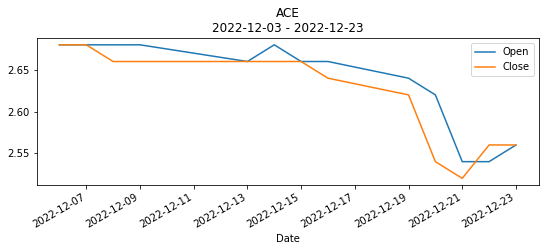

In [280]:
Plot_Graph_Open_Close(table_pice,"ACE","2022-12-03","2022-12-23")

In [224]:
table_pice_sort = table_pice.sort_values(by=['Symbol','Date'], ascending=True, ignore_index=True)
table_pice_sort

,Symbol,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
0,ACE,2022-11-24,2.68,2.70,2.68,2.68,0.00,0.00,17189362,46111.18
1,ACE,2022-11-25,2.68,2.70,2.66,2.68,0.00,0.00,16769600,44944.21
2,ACE,2022-11-28,2.68,2.70,2.68,2.68,0.00,0.00,9522506,25523.49
3,ACE,2022-11-29,2.68,2.70,2.66,2.68,0.00,0.00,13902608,37258.61
4,ACE,2022-11-30,2.68,2.70,2.66,2.70,0.02,0.75,14868502,39929.54
...,...,...,...,...,...,...,...,...,...,...
1995,WHA,2022-12-19,3.90,3.94,3.88,3.90,0.00,0.00,38938765,152117.79
1996,WHA,2022-12-20,3.90,3.92,3.84,3.86,-0.04,-1.03,69973534,270641.92
1997,WHA,2022-12-21,3.86,3.88,3.84,3.84,-0.02,-0.52,27992859,107960.89
1998,WHA,2022-12-22,3.86,3.90,3.86,3.86,0.02,0.52,19555687,75760.07
